In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
gesture_dataset =r"C:\Users\User\project1\gesture_dataset"

img_size =256
batch_size = 32

data_gen = ImageDataGenerator(rescale=1./255,rotation_range=25,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
                              zoom_range=0.2,brightness_range=[0.7, 1.3],horizontal_flip=True,validation_split=0.2)


train_data = data_gen.flow_from_directory(gesture_dataset,target_size=(img_size, img_size),batch_size=batch_size,class_mode='categorical',
                                          subset='training')

val_data = data_gen.flow_from_directory(gesture_dataset,target_size=(img_size, img_size),batch_size=batch_size,class_mode='categorical',
                                        subset='validation')
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size,img_size,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_data.class_indices), activation='softmax')])


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(train_data, validation_data=val_data, epochs=10, callbacks=[early_stop])

In [15]:
model.save("gesture_cnn_model.h5")

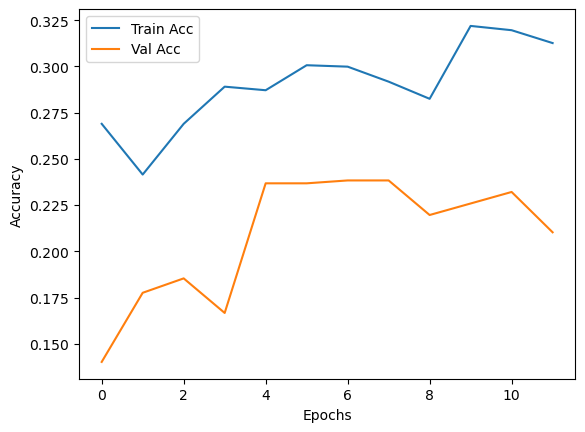

In [19]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
print(train_data.class_indices)

{'Pointing': 0, 'fist': 1, 'none': 2, 'ok': 3, 'palm': 4, 'peace': 5, 'stop': 6, 'thumbs_down': 7, 'thumps_up': 8}


In [4]:
model = tf.keras.models.load_model(r"C:\Users\User\project1\gesture_cnn_model.h5")

class_labels = ['Pointing', 'fist', 'none', 'ok', 'palm', 'peace', 'stop', 'thumbs_down', 'thumps_up']

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1)

    x, y, w, h = 100, 100, 300, 300
    roi = frame[y:y+h, x:x+w]

    cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)


    roi_resized = cv2.resize(roi, (258, 258))
    roi_normalized = roi_resized.astype('float32') / 255.0
    roi_expanded = np.expand_dims(roi_normalized, axis=0) 


    prediction = model.predict(roi_expanded)
    predicted_class = np.argmax(prediction)
    label = class_labels[predicted_class]


    cv2.putText(frame, label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX,
                1, (0, 255, 0), 2)

    cv2.imshow("Hand Gesture Recognition", frame)


    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━